### 프로젝트 주제: 지하철 혼잡 시간대 및 노선 분석

**목표**

- 지하철 이용 패턴을 분석하여 시간대별 혼잡도를 시각화
- 주요 노선 및 시간대의 승객 분포를 파악
- 데이터를 기반으로 혼잡도를 완화할 수 있는 개선안 제시

#### 1. 데이터 수집

- **데이터 소스**: <u>공공 데이터 포털</u>에서 "대중교통 이용 데이터" 또는 서울교통공사의 승하차 데이터셋 활용
    - 한국교통안전공단
        - 지역 간 대중교통 시간대별 철도 이용인원 : https://www.data.go.kr/data/15119714/fileData.do
        - 지역 간 대중교통 요일별 이용인원 : https://www.data.go.kr/data/15119717/fileData.do
        - 서울시 지하철호선별 역별 승하차 인원 정보 : http://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do
        
<br>

- **대안 데이터**: Kaggle에 있는 교통 관련 데이터셋 활용
- **데이터 내용**:
    - 시간대별 승하차량
    - 노선 번호 및 정류장 이름
    - 요일(평일/주말) 및 계절별 변화

In [177]:
import numpy as np
import pandas as pd

# 시간대별 지하철 이용인원
subway_by_time = pd.read_csv("data/한국교통안전공단_지역 간 대중교통 시간대별 철도 이용인원 현황(2022년).csv", encoding="cp949")

# 요일별 지하철 이용인원
subway_by_day = pd.read_csv("data/한국교통안전공단_지역 간 요일별 대중교통 이용인원 현황(2022년).csv", encoding="cp949")

# 노선별 지하철 이용인원
subway_by_line = pd.read_csv("data/CARD_SUBWAY_MONTH_2022.csv", encoding="cp949")


#### 2. 데이터 전처리
- 도구: Python (Pandas)
- 작업 내용:
    1. 결측치 처리: 결측값 또는 잘못된 데이터를 탐지하고 보완
    2. 데이터 통합: 여러 소스에서 수집된 데이터를 통합
        - 추후 필요할 때 진행

1. 결측치 처리

- 시간대별 지하철 이용인원

In [178]:
subway_by_time.head()

,구분1,평일평균,토요일,일요일
0,00:00~00:59,161,297,247
1,01:00~01:59,0,0,0
2,02:00~02:59,0,0,1
3,03:00~03:59,0,0,0
4,04:00~04:59,80,30,18


In [179]:
subway_by_time.rename(columns = {'구분1': '시간대'}, inplace= True)
subway_by_time.head(10)

,시간대,평일평균,토요일,일요일
0,00:00~00:59,161,297,247
1,01:00~01:59,0,0,0
2,02:00~02:59,0,0,1
3,03:00~03:59,0,0,0
4,04:00~04:59,80,30,18
5,05:00~05:59,3868,4038,2114
6,06:00~06:59,10518,11449,5573
7,07:00~07:59,18337,21538,10068
8,08:00~08:59,19353,27204,15483
9,09:00~09:59,20271,33375,21105


- 요일별 지하철 이용인원

In [180]:
subway_by_day

,구분1,월요일,화요일,수요일,목요일,금요일,토요일,일요일
0,고속버스,85120,68744,65369,74565,129145,148007,148802
1,시외버스,196665,162736,156471,169061,244741,240060,251836
2,일반철도,295923,261166,254397,284132,417717,437661,440481


In [181]:
subway_by_day.rename(columns = {'구분1': '교통수단'}, inplace= True)
subway_by_day

,교통수단,월요일,화요일,수요일,목요일,금요일,토요일,일요일
0,고속버스,85120,68744,65369,74565,129145,148007,148802
1,시외버스,196665,162736,156471,169061,244741,240060,251836
2,일반철도,295923,261166,254397,284132,417717,437661,440481


In [182]:
subway_by_day = subway_by_day.loc[subway_by_day['교통수단'] == '일반철도']
subway_by_day

,교통수단,월요일,화요일,수요일,목요일,금요일,토요일,일요일
2,일반철도,295923,261166,254397,284132,417717,437661,440481


- 노선별 지하철 이용인원 (행 많음 주의)

In [183]:
subway_by_line

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
20220101,3호선,수서,7370,7076,20220104,NaN
20220101,3호선,학여울,461,473,20220104,NaN
20220101,3호선,대청,3224,2903,20220104,NaN
20220101,3호선,일원,3321,2803,20220104,NaN
20220101,경원선,창동,1,0,20220104,NaN
...,...,...,...,...,...,...
20221231,4호선,신용산,11025,12099,20230103,NaN
20221231,경부선,석수,5643,5147,20230103,NaN
20221231,경부선,금천구청,7519,7426,20230103,NaN
20221231,경부선,가산디지털단지,5579,7299,20230103,NaN


In [184]:
# '사용일자' 컬럼의 값이 index에 있다 (한 칸씩 밀려있다)
subway_by_line.index

Index([20220101, 20220101, 20220101, 20220101, 20220101, 20220101, 20220101,
       20220101, 20220101, 20220101,
       ...
       20221231, 20221231, 20221231, 20221231, 20221231, 20221231, 20221231,
       20221231, 20221231, 20221231],
      dtype='int64', length=219745)

In [185]:
# 인덱스 해제
subway_by_line.reset_index(inplace=True)
subway_by_line.head()

,index,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20220101,3호선,수서,7370,7076,20220104,NaN
1,20220101,3호선,학여울,461,473,20220104,NaN
2,20220101,3호선,대청,3224,2903,20220104,NaN
3,20220101,3호선,일원,3321,2803,20220104,NaN
4,20220101,경원선,창동,1,0,20220104,NaN


In [186]:
# 컬럼명과 값 조정
subway_by_line.columns = ['사용일자', '노선명', '역명', '승차총승객수','하차총승객수','등록일자','NaN']
# 맨 끝 결측행 제거(subway_by_line.dropna() 로도 가능)
subway_by_line.drop('NaN', axis = 1, inplace=True)
subway_by_line.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20220101,3호선,수서,7370,7076,20220104
1,20220101,3호선,학여울,461,473,20220104
2,20220101,3호선,대청,3224,2903,20220104
3,20220101,3호선,일원,3321,2803,20220104
4,20220101,경원선,창동,1,0,20220104


In [187]:
subway_by_line.isnull().sum()

사용일자      0
노선명       0
역명        0
승차총승객수    0
하차총승객수    0
등록일자      0
dtype: int64

In [188]:
# 전처리 완료
subway_by_line.head()

,사용일자,노선명,역명,승차총승객수,하차총승객수,등록일자
0,20220101,3호선,수서,7370,7076,20220104
1,20220101,3호선,학여울,461,473,20220104
2,20220101,3호선,대청,3224,2903,20220104
3,20220101,3호선,일원,3321,2803,20220104
4,20220101,경원선,창동,1,0,20220104


2. 데이터 통합
    - 추후 필요할 때 진행

3. 데이터 시각화



- 시간대별 지하철 혼잡도

In [189]:
subway_by_time.head(10)

,시간대,평일평균,토요일,일요일
0,00:00~00:59,161,297,247
1,01:00~01:59,0,0,0
2,02:00~02:59,0,0,1
3,03:00~03:59,0,0,0
4,04:00~04:59,80,30,18
5,05:00~05:59,3868,4038,2114
6,06:00~06:59,10518,11449,5573
7,07:00~07:59,18337,21538,10068
8,08:00~08:59,19353,27204,15483
9,09:00~09:59,20271,33375,21105


In [190]:
# 다중 막대그래프의 x축 만들기
index = np.arange(subway_by_time.shape[0])
print(index)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


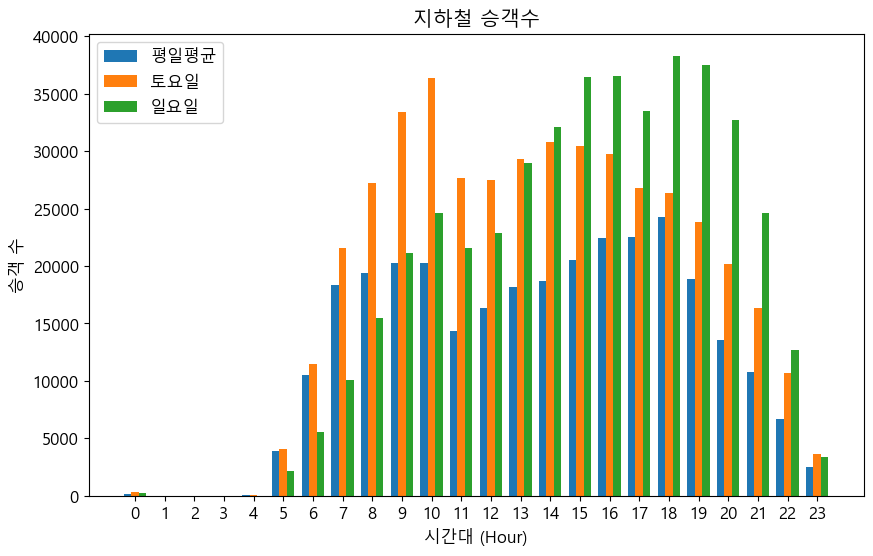

In [199]:
import matplotlib.pyplot as plt
import matplotlib


# 한글 깨짐 방지
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(10, 6))

w = 0.25
plt.bar(index-w, subway_by_time['평일평균'], width = w, label='평일평균')
plt.bar(index, subway_by_time['토요일'], width = w, label='토요일')
plt.bar(index+w, subway_by_time['일요일'], width = w, label='일요일')

plt.title('지하철 승객수')
plt.xlabel('시간대 (Hour)')
plt.ylabel('승객 수')
plt.xticks(index)
plt.legend()
plt.show()

- 요일별 지하철 혼잡도

In [192]:
subway_by_day.iloc[0, 1:]
subway_by_day.drop(subway_by_day.columns[0], axis=1, inplace=True)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_10832\2978456047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subway_by_day.drop(subway_by_day.columns[0], axis=1, inplace=True)


In [193]:
subway_by_day.columns
subway_by_day.iloc[0]
subway_by_day = subway_by_day.transpose()

In [195]:
# subway_by_day.reset_index(inplace=True)
subway_by_day.columns = ['요일', '승객수']
subway_by_day

,요일,승객수
0,월요일,295923
1,화요일,261166
2,수요일,254397
3,목요일,284132
4,금요일,417717
5,토요일,437661
6,일요일,440481


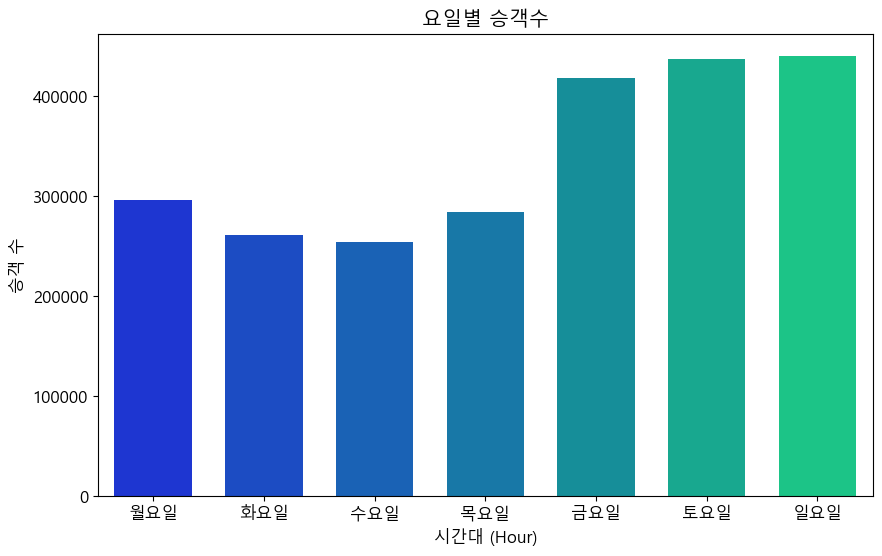

In [213]:
import seaborn as sns


plt.figure(figsize=(10, 6))

w = 0.7
sns.barplot(subway_by_day, x="요일", y="승객수", width = w, palette='winter', hue="요일")

plt.title('요일별 승객수')
plt.xlabel('시간대 (Hour)')
plt.ylabel('승객 수')
plt.show()

- 노선별 지하철 혼잡도